In [1]:
# Importing Required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

In [2]:
import datetime

In [4]:
# Reading Files
prod_t_df = pd.read_csv('pt.csv',low_memory=False)

In [5]:
# Selecting RingFrame Machines in Code 'C'
unit_code = 'C'
hank_df = prod_t_df[['pt_date','pt_count','pt_ucode','pt_mcode','pt_hanks']]
hank_df = hank_df[hank_df['pt_ucode']== unit_code]
hank_df = hank_df [hank_df.pt_mcode.str.contains('^RF')]
hank_df.pt_mcode.unique()

array(['RF-47', 'RF-34', 'RF-10', 'RF-08', 'RF-48', 'RF-02', 'RF-06',
       'RF-21', 'RF-25', 'RF-18', 'RF-33', 'RF-31', 'RF-28', 'RF-19',
       'RF-30', 'RF-39', 'RF-24', 'RF-16', 'RF-03', 'RF-45', 'RF-35',
       'RF-22', 'RF-07', 'RF-26', 'RF-11', 'RF-46', 'RF-36', 'RF-17',
       'RF-41', 'RF-40', 'RF-27', 'RF-23', 'RF-12', 'RF-01', 'RF-37',
       'RF-42', 'RF-32', 'RF-38', 'RF-04', 'RF-09', 'RF-13', 'RF-29',
       'RF-05', 'RF-43', 'RF-14', 'RF-20', 'RF-44', 'RF-15'], dtype=object)

In [6]:
rf_code = 'RF-01'
hank_df =  hank_df[hank_df.pt_date.str.contains('2018$')]
hank_df = hank_df[hank_df['pt_mcode']== rf_code] 
count_codes = list(hank_df.pt_count.unique())
count_codes

['42s CKC', '45s CKC', '50 CK', '40s CKC']

In [7]:
hank_df['pt_date'] =pd.to_datetime(hank_df.pt_date)
hank_df = hank_df.sort_values(by='pt_date')
data = hank_df[['pt_date','pt_count','pt_hanks']]
data

,pt_date,pt_count,pt_hanks
153068,2018-01-01,50 CK,11.677275
128577,2018-01-01,50 CK,14.014232
193474,2018-01-01,50 CK,13.593308
200181,2018-01-02,50 CK,8.698877
290897,2018-01-02,50 CK,13.555303
265513,2018-01-02,50 CK,12.784383
152591,2018-01-03,40s CKC,15.410353
8038,2018-01-03,40s CKC,14.758636
270931,2018-01-03,40s CKC,12.846912
120649,2018-01-04,42s CKC,10.735774


In [8]:
months = []
for i in range(1,13):
    month = datetime.date(1900,i, 1).strftime('%B')
    months.append(month)
df_t = pd.DataFrame(months, columns = ['months']) 
df_t

,months
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


In [9]:
for code in count_codes:
    monthly_data = []
    hank_df_t = hank_df[hank_df['pt_count'] ==  code]
    grouped = hank_df_t.groupby('pt_date', as_index=False)
    grouped = grouped['pt_hanks'].agg(np.sum)
    for i in range(1,13):
        mon_grouped_flags = grouped['pt_date'].map(lambda x: x.month) == i
        mon_grouped = grouped[mon_grouped_flags]
        monthly_data.append(sum(mon_grouped['pt_hanks']))
    df_t[code]=monthly_data
df_t.index = months
df_t.drop(['months'], axis=1, inplace=True)
df_t

,42s CKC,45s CKC,50 CK,40s CKC
January,238.024069,41.852782,720.311513,87.124106
February,259.989792,42.596524,139.091774,728.824118
March,899.538230,43.369325,78.051150,85.003357
April,1026.849767,43.224045,77.587362,86.061522
May,865.201208,43.734014,79.772518,87.423616
June,220.072375,811.307896,79.467709,87.354789
July,1020.603511,156.429427,79.976794,82.936302
August,1153.873492,44.388381,65.518769,90.698209
September,1045.047606,22.625831,82.014024,86.958388
October,275.961929,59.293734,78.524772,927.082020


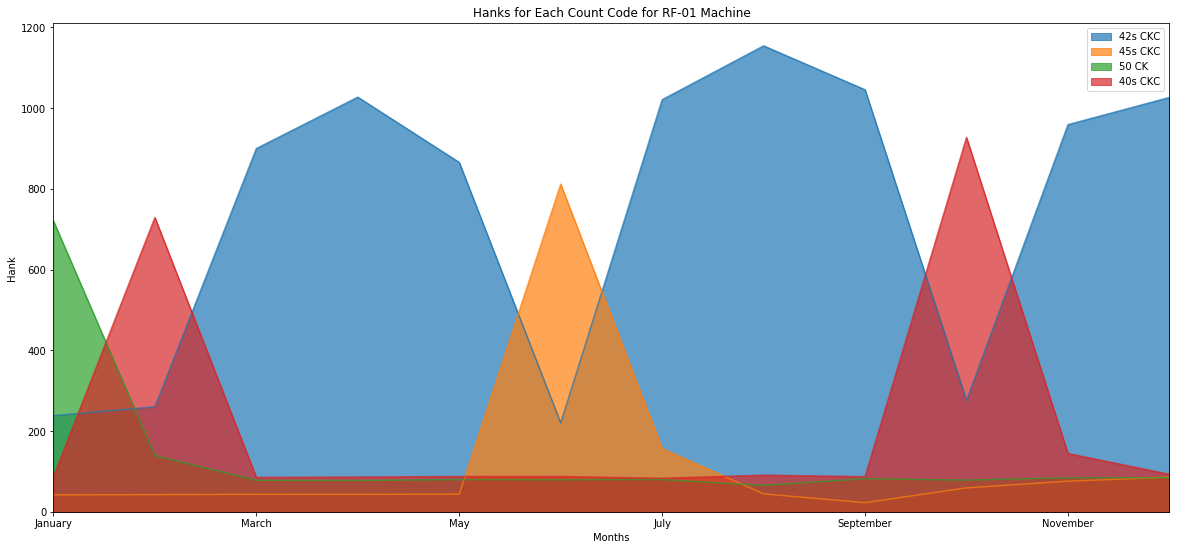

In [10]:

df_t.plot(kind='area', alpha=0.7, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 9), # pass a tuple (x, y) size
            ) 
plt.title('Hanks for Each Count Code for RF-01 Machine')
plt.ylabel('Hank')
plt.xlabel('Months')
plt.show()

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = []
for code in count_codes:
    data.append(go.Scatter(
    x=months,
    y=list(df_t[code]),
    fill='tozeroy',
    mode= 'none',
    name = code
    ))
layout = go.Layout(title='RingFrame Machine Analysis: '+rf_code)
fig = go.Figure(data=data, layout=layout)
plot(fig,filename='RFMachines.html')


'RFMachines.html'